https://scipython.com/blog/simulating-the-belousov-zhabotinsky-reaction/

<IPython.core.display.Javascript object>


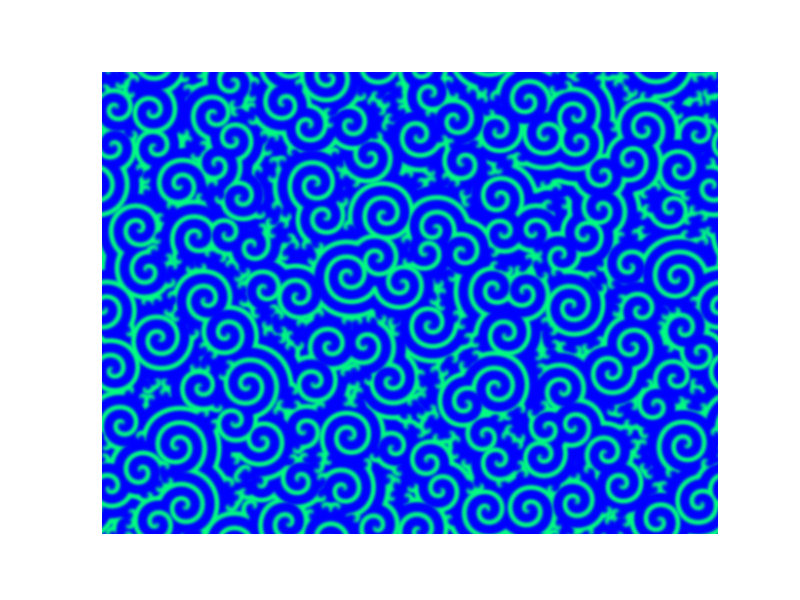

In [234]:
%matplotlib notebook

import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from matplotlib import animation

# Width, height of the image.
nx, ny = 600, 450
# Reaction parameters.
alpha, beta, gamma = 1, 1, 1

def update(p,arr):
    """Update arr[p] to arr[q] by evolving in time."""

    # Count the average amount of each species in the 9 cells around each cell
    # by convolution with the 3x3 array m.
    q = (p+1) % 2
    s = np.zeros((3, ny,nx))
    m = np.ones((3,3)) / 9
    for k in range(3):
        s[k] = convolve2d(arr[p,k], m, mode='same', boundary='wrap')
    # Apply the reaction equations
    arr[q,0] = s[0] + s[0]*(alpha*s[1] - gamma*s[2])
    arr[q,1] = s[1] + s[1]*(beta*s[2] - alpha*s[0])
    arr[q,2] = s[2] + s[2]*(gamma*s[0] - beta*s[1])
    # Ensure the species concentrations are kept within [0,1].
    np.clip(arr[q], 0, 1, arr[q])
    return arr

# Initialize the array with random amounts of A, B and C.
arr = np.random.random(size=(2, 3, ny, nx))

# Set up the image
fig, ax = plt.subplots()
im = ax.imshow(arr[0,0], cmap=plt.cm.winter)
ax.axis('off')

def animate(i, arr):
    arr = update(i % 2, arr)
    im.set_array(arr[i % 2, 0])
    return [im]

anim = animation.FuncAnimation(fig, animate, frames=200, interval=5,
                               blit=False, fargs=(arr,))

plt.show()

In [1]:
%load_ext autoreload
%autoreload 2

In [182]:
import torch
from easy_utils import make_torch_tensor_aesthetic

make_torch_tensor_aesthetic()

In [247]:
state = torch.rand(4, 100, 100)

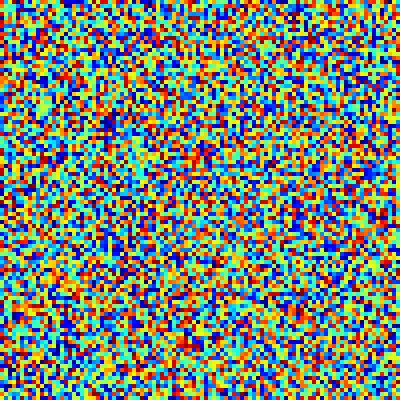

In [257]:
state.ae.cmap('jet').zoom(4).pil[2]